In [1]:
cd ../

/mnt/Stuff/Acads/UGP/mycode


In [2]:
import numpy as np
import librosa
import librosa.display as display
import matplotlib.pyplot as plt
import IPython

In [3]:
sr = 22050

In [4]:
Ust = 5
#F = psd.shape[0]
Fmin = librosa.note_to_hz('C2')
Fmax = librosa.note_to_hz('C7')
#Fmax = 20000

In [5]:
U = int(np.log2(Fmax/Fmin) * 12*Ust +1)

In [6]:
def uf(u,Fmin,Ust):
    return Fmin * np.power(2,(u)/(12*Ust))

In [7]:
note = uf(np.arange(int(np.log2(Fmax/Fmin) * 12*1 +1)) , Fmin,1)

In [39]:
stuff = np.load('/mnt/Stuff/Acads/UGP/mycode/outputs/out_01-AchGottundHerr.npz')
HF0 = stuff['arr_5']

In [45]:
stuff = np.load('outputs/out_01-AchGottundHerr_split.npz')
HPHI_bg = stuff['arr_0']
HPHI_voc = stuff['arr_1']
HF0_bg = stuff['arr_2']
HF0_voc = stuff['arr_3']
WM = stuff['arr_4']
HM = stuff['arr_5']
SX = stuff['arr_6']

In [47]:
N = HF0_voc.shape[1]

In [48]:
N

2529

In [53]:
fund_bad = np.zeros([U,N])
for i in range(N):
    m = np.amax(HF0[:,i])
    mi = np.argwhere(HF0[:,i] == m)
    for x in mi:
        fund_bad[x,i] = m

In [50]:
fund_bad = np.zeros([U,N])
for i in range(N):
    m = np.amax(HF0_voc[:,i])
    mi = np.argwhere(HF0_voc[:,i] == m)
    for x in mi:
        fund_bad[x,i] = m

In [54]:
predict = np.zeros([61,N])
for j in range(N):
    start =0
    predict[0,j] = np.amax(fund_bad[0:start+2+1,j])
    i=1
    start = i*5
    while start < 60*5:
        predict[i,j] = np.amax(fund_bad[start-2:start+2+1,j])
        i+=1
        start = i*5
    predict[i,j] = np.amax(fund_bad[start-2:start,j])

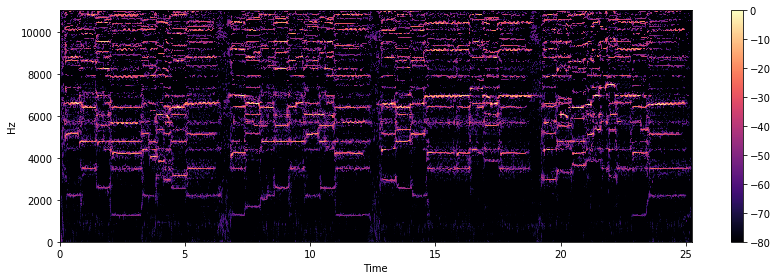

In [20]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(HF0, ref=np.max),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=220)
plt.colorbar()
plt.tight_layout()

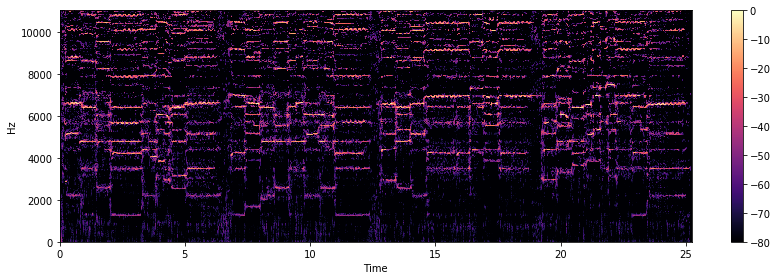

In [24]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(HF0_voc, ref=np.max),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=220)
plt.colorbar()
plt.tight_layout()

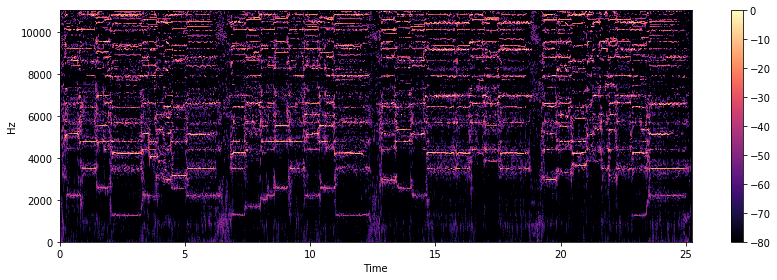

In [25]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(HF0_bg, ref=np.max),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=220)
plt.colorbar()
plt.tight_layout()

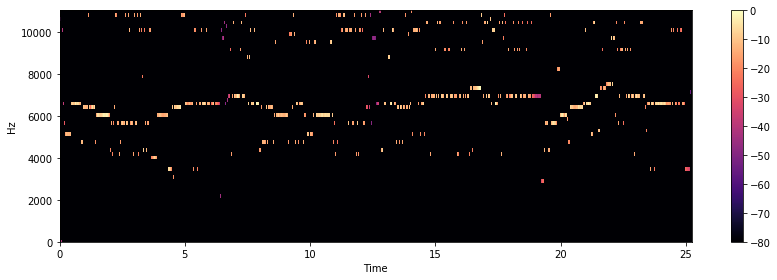

In [27]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(predict, ref=np.max),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=220)
plt.colorbar()
plt.tight_layout()

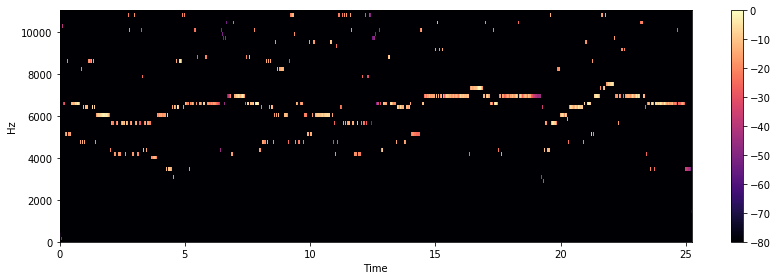

In [55]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(predict, ref=np.max),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=220)
plt.colorbar()
plt.tight_layout()

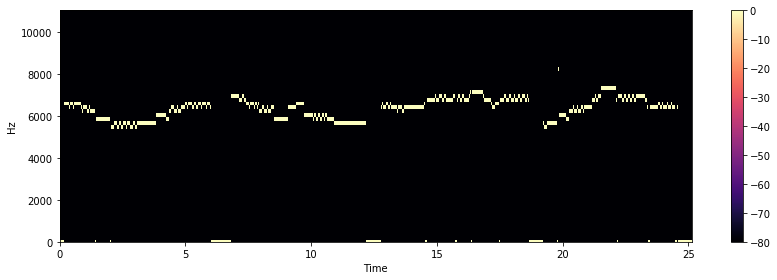

In [32]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(grmat, ref=np.max),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=220)
plt.colorbar()
plt.tight_layout()

ground

In [29]:
liz_ground = "/mnt/Stuff/Acads/UGP/mycode/ground_bach/01-AchGottundHerr-violin.npy"
gl = np.load(liz_ground)

In [17]:
liz_ground = "/mnt/Stuff/Acads/UGP/mycode/ground_/leon_4_02.npy"
gl = np.load(liz_ground)

In [30]:
gl.shape

(2519,)

In [31]:
grmat = np.zeros([61,gl.shape[0]])
for i in range(gl.shape[0]):
    if gl[i]!=0:
        grmat[int(max(gl[i] -1, 0)) , i] +=1

In [18]:
gl.shape[0]

2519

In [17]:
N

2529

In [44]:
n=0
acc = 0
for i in range(2519):
    min = np.max
    pr = np.nonzero(predict[:,i])[0]

    if gl[i] == 0:
        #n-=1
        continue
    if pr.size==0:
        #n-=1
        continue

    x = np.min(abs(pr - gl[i]))
    n+=1
    #print(x)
    if x %12 <2:
        acc+=1
acc/n

0.6214171974522293

In [52]:
n=0
acc = 0
for i in range(2519):
    min = np.max
    pr = np.nonzero(predict[:,i])[0]

    if gl[i] == 0:
        #n-=1
        continue
    if pr.size==0:
        #n-=1
        continue

    x = np.min(abs(pr - gl[i]))
    n+=1
    #print(x)
    if x %12 < 2:
        acc+=1
acc/n

0.545308095046315

Raw Pitch and Chroma acc

In [39]:
def RPA():
    n=N
    acc = 0
    for i in range(N):
        min = np.max
        pr = np.nonzero(predict[:,i])[0]
        
        if gl[i] == 0:
            n-=1
            continue
        if pr.size==0:
            continue
        
        x = np.min(abs(pr - gl[i]))
        
        if x == 0:
            acc+=1
    return acc/n

In [40]:
def RCA():
    n=N
    acc = 0
    for i in range(N):
        min = np.max
        pr = np.nonzero(predict[:,i])[0]
        
        if gl[i] == 0:
            n-=1
            continue
        if pr.size==0:
            continue
        
        x = np.min(abs(pr - gl[i]))
        
        if x % 12 == 0:
            acc+=1
    return acc/n